# Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from workflow.preprocessing import preprocess
from workflow.model import init_model, compile_model, fit_model, evaluate_model, predict
from workflow.model_evaluation import train_test_split, get_X_y, cross_validate

2022-12-05 12:36:40.031658: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data

In [4]:
PA75016_df = pd.read_csv("../../data/pollution/2_Processed/PA75016.csv").copy()
PA75016_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42571,2022/11/14 20:00:00+00,14.5,18.8,41.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42572,2022/11/14 21:00:00+00,NaN,NaN,34.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42573,2022/11/14 22:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
42574,2022/11/14 23:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic


In [5]:
df = preprocess(PA75016_df)
df

You have dropped O3 with 100.0% of NA
You have dropped SO2 with 40.2% of NA
['PM25', 'PM10', 'NO2', 3]
DataFrame is processed, you can play with it !


,PM25,PM10,NO2,Pollution_peak,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement
Date_time,,,,,,,,,,
2018-01-01,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,-0.781831,0.623490,0
2018-01-02,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,0.000000,1.000000,0
2018-01-03,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,0.781831,0.623490,0
2018-01-04,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,0.974928,-0.222521,0
2018-01-05,-0.025605,-0.131895,-0.840686,0.0,0,0.000000,1.0,0.433884,-0.900969,0
...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.504979,-0.603390,-0.507353,0.0,0,-0.866025,0.5,0.781831,0.623490,0
2022-11-10,0.012802,-0.389522,-0.465686,0.0,0,-0.866025,0.5,0.974928,-0.222521,0
2022-11-11,-0.315789,-0.951002,-1.296569,0.0,0,-0.866025,0.5,0.433884,-0.900969,0


In [6]:
df['ATMO'].value_counts()

1    675
2    639
0    461
Name: ATMO, dtype: int64

In [7]:
df.describe()

,PM25,PM10,NO2,Pollution_peak,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1.775000e+03,1.775000e+03,1775.000000,1775.000000,1775.000000
mean,0.287425,0.161112,0.093362,0.003944,1.100282,1.422463e-02,-2.556229e-02,0.000353,0.000282,0.072676
std,1.009216,0.818783,0.780630,0.062692,0.781029,7.085565e-01,7.054467e-01,0.707206,0.707406,0.259677
min,-1.421053,-1.356549,-2.125000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,0.000000
25%,-0.368421,-0.424037,-0.470588,0.000000,0.000000,-5.000000e-01,-8.660254e-01,-0.781831,-0.900969,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.224647e-16,-1.836970e-16,0.000000,-0.222521,0.000000
75%,0.631579,0.575963,0.529412,0.000000,2.000000,8.660254e-01,5.000000e-01,0.781831,0.623490,0.000000
max,6.728307,4.478274,4.426471,1.000000,2.000000,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000


# Cross-validate

Folds shape: (7, 521, 10)
The function generated 7 folds.
Each fold has a shape equal to (521, 10).


Fold n°1
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------


2022-12-05 11:54:34.057651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


fit_model executed in 20.21 seconds, using up to 21.29MB of RAM


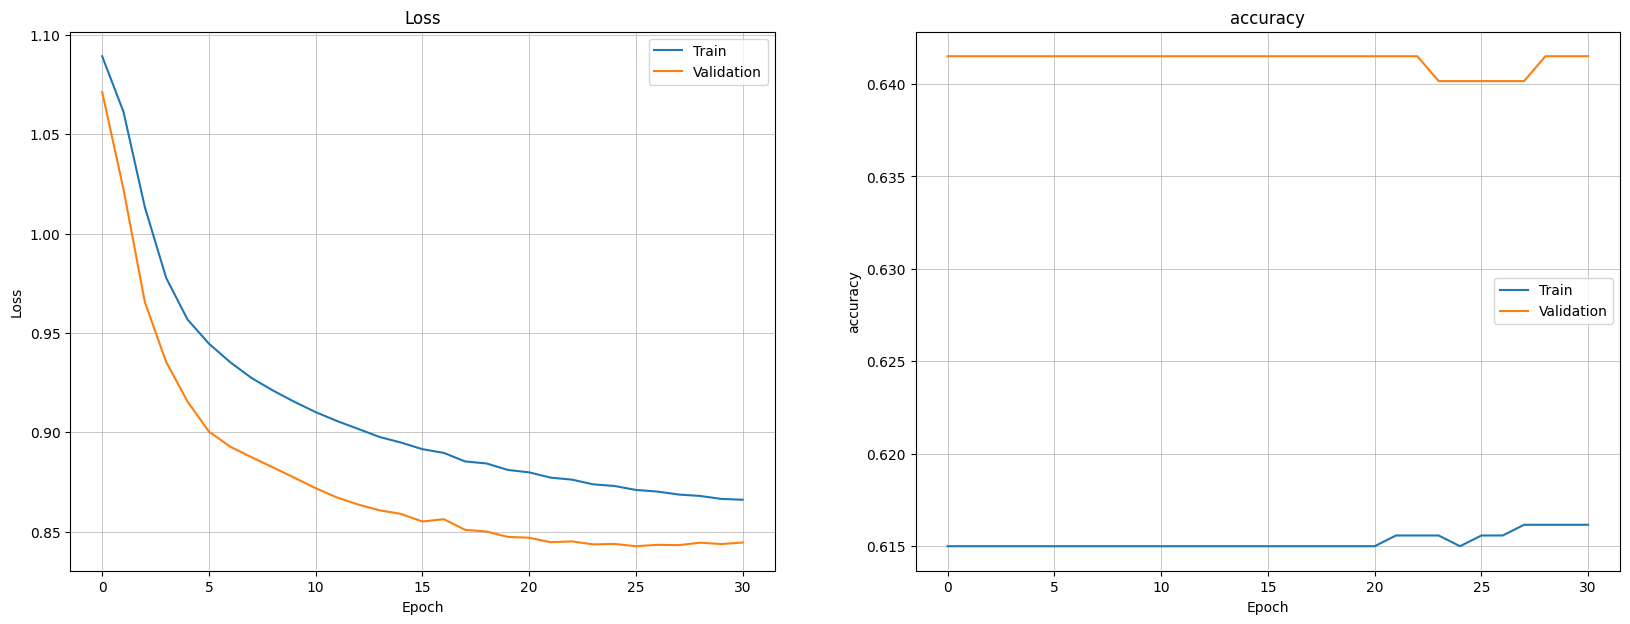

5/5 [==============================] - 0s 5ms/step - loss: 0.8828 - accuracy: 0.6486
✅ Model evaluated: loss 0.88 accuracy 0.65


Accuracy baseline fold n°1 = 0.39
Accuracy LSTM fold n°1 = 0.65
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 65.61 % 

Fold n°2
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 29.66 seconds, using up to 19.43MB of RAM


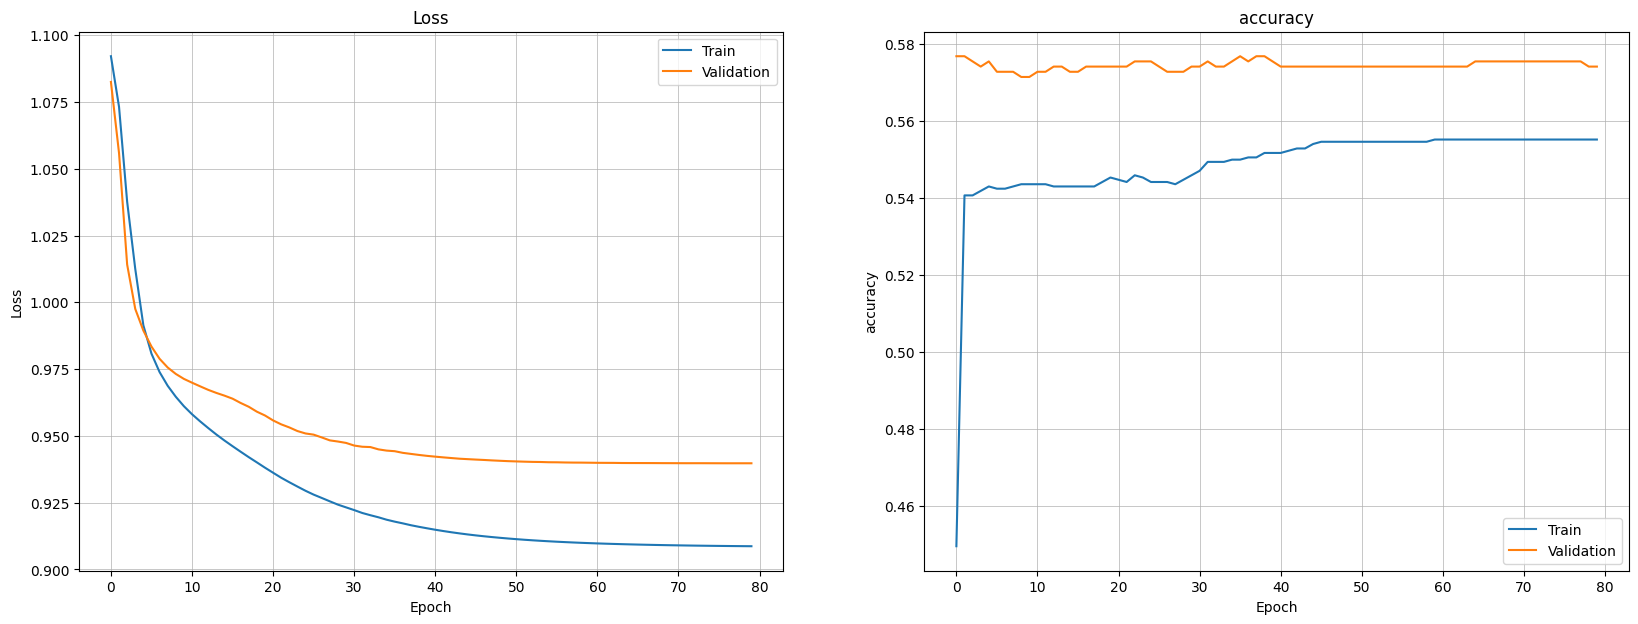

5/5 [==============================] - 0s 7ms/step - loss: 1.3520 - accuracy: 0.2248
✅ Model evaluated: loss 1.35 accuracy 0.22


Accuracy baseline fold n°2 = 0.39
Accuracy LSTM fold n°2 = 0.22
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -42.61 % 

Fold n°3
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 20.94 seconds, using up to 19.28MB of RAM


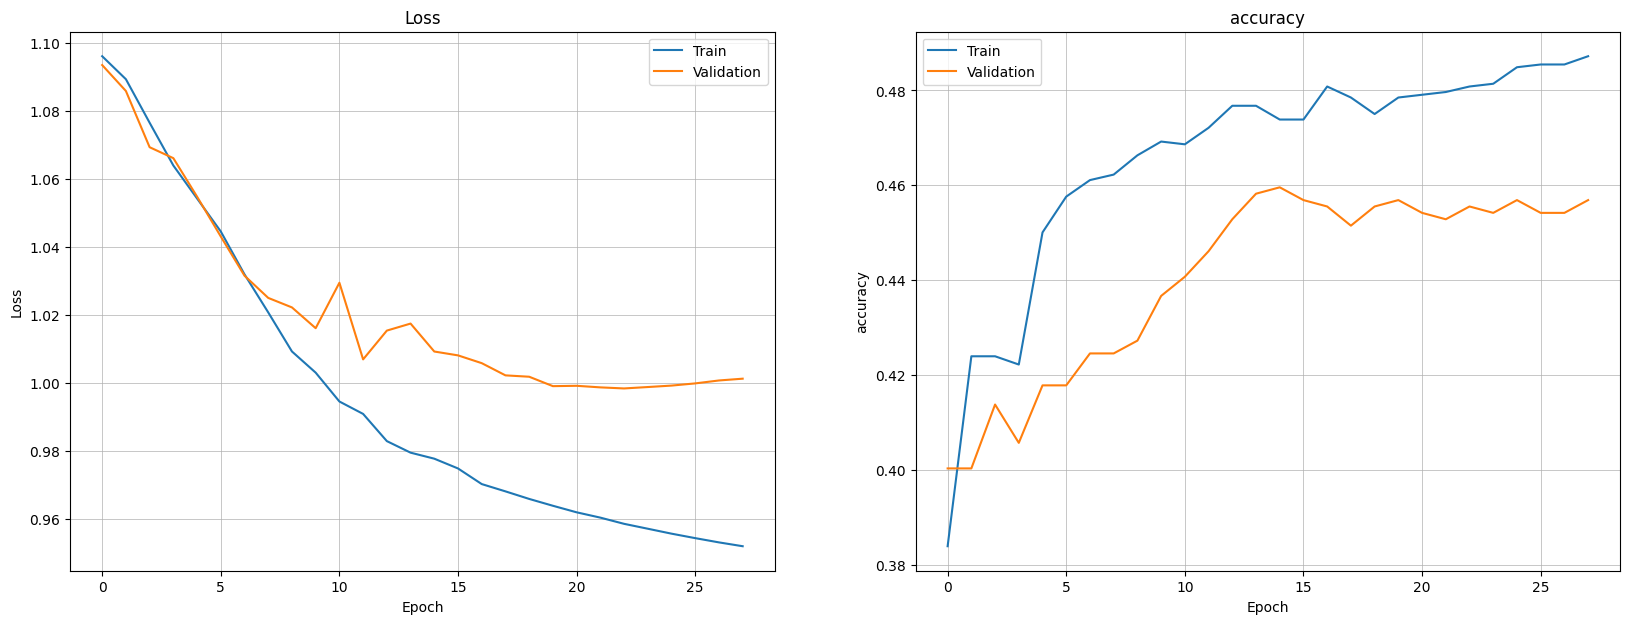

5/5 [==============================] - 0s 5ms/step - loss: 1.3548 - accuracy: 0.2781
✅ Model evaluated: loss 1.35 accuracy 0.28


Accuracy baseline fold n°3 = 0.39
Accuracy LSTM fold n°3 = 0.28
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -28.99 % 

Fold n°4
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 19.95 seconds, using up to 19.35MB of RAM


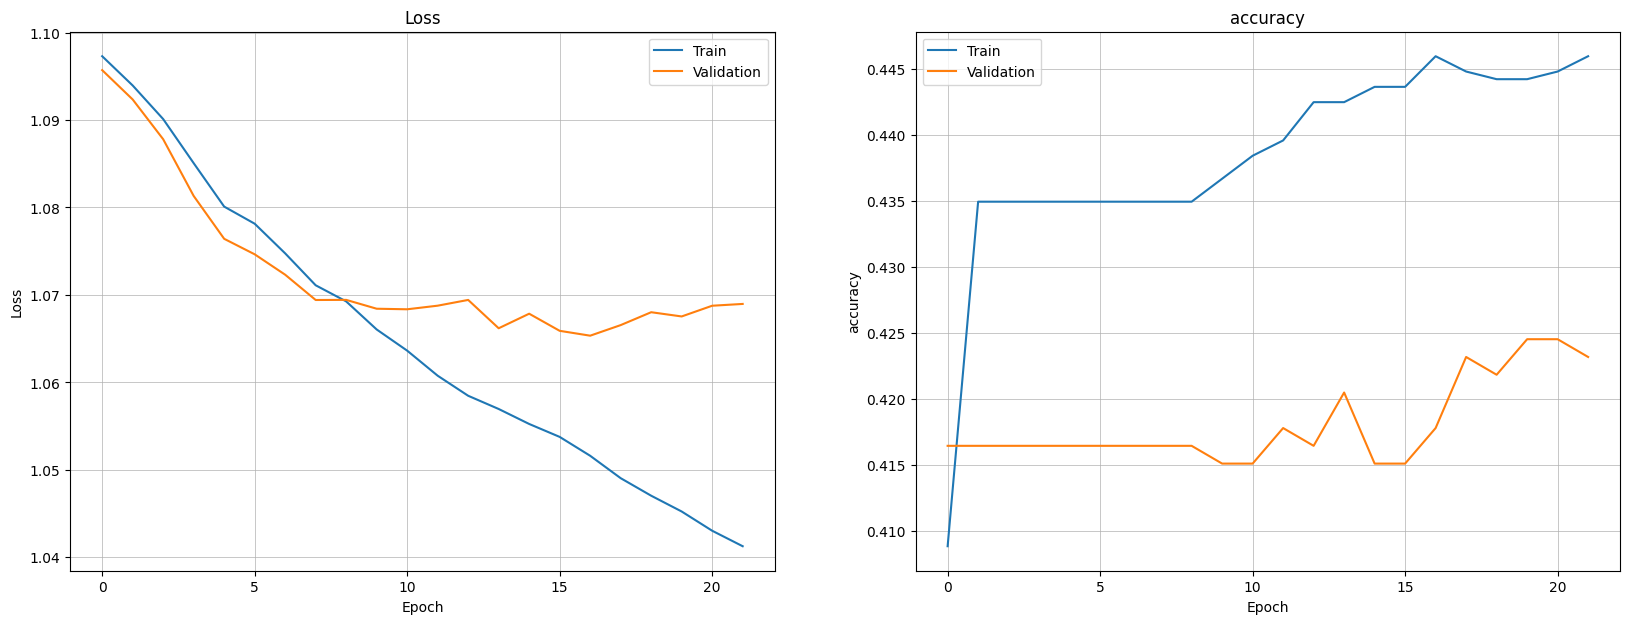

5/5 [==============================] - 0s 6ms/step - loss: 1.1038 - accuracy: 0.3705
✅ Model evaluated: loss 1.1 accuracy 0.37


Accuracy baseline fold n°4 = 0.39
Accuracy LSTM fold n°4 = 0.37
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -5.4 % 

Fold n°5
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 20.18 seconds, using up to 19.32MB of RAM


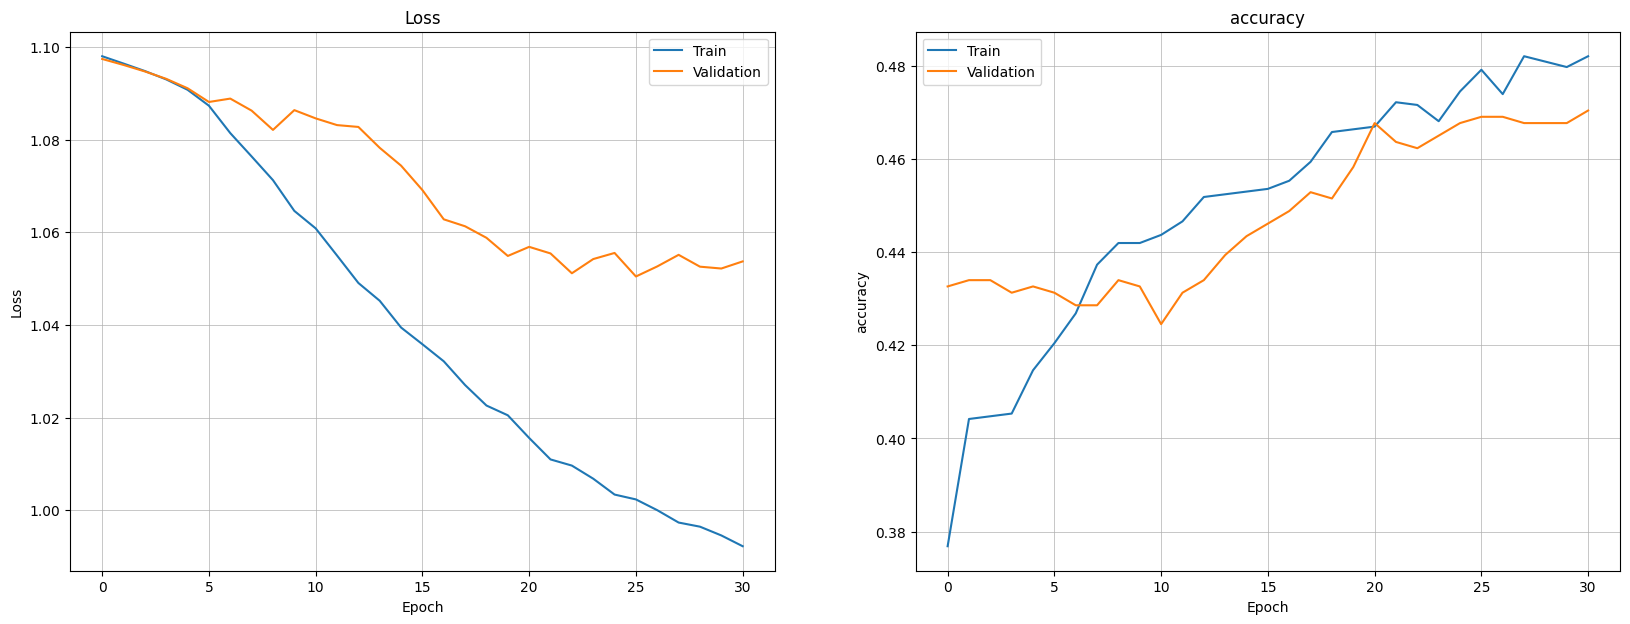

5/5 [==============================] - 0s 6ms/step - loss: 1.2083 - accuracy: 0.3667
✅ Model evaluated: loss 1.21 accuracy 0.37


Accuracy baseline fold n°5 = 0.39
Accuracy LSTM fold n°5 = 0.37
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -6.37 % 

Fold n°6
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 18.03 seconds, using up to 19.28MB of RAM


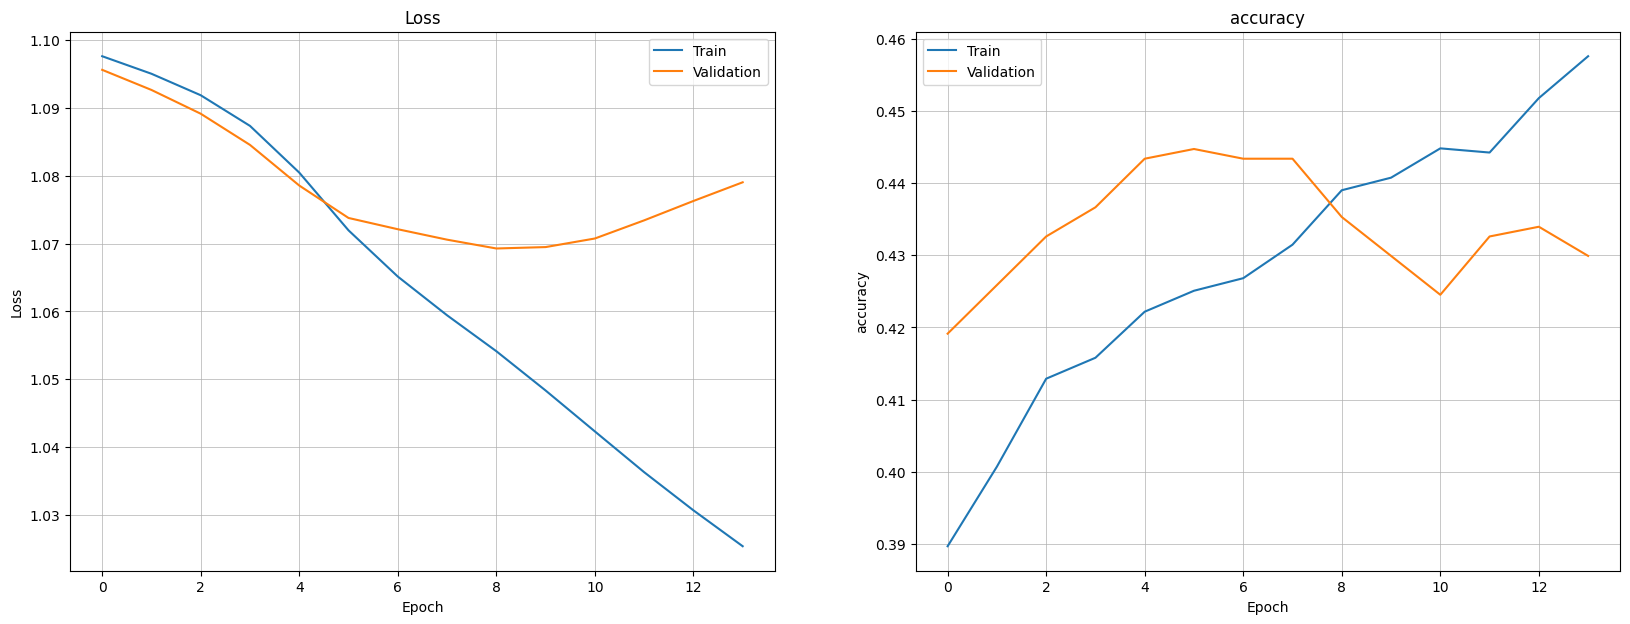

5/5 [==============================] - 0s 5ms/step - loss: 1.0786 - accuracy: 0.4819
✅ Model evaluated: loss 1.08 accuracy 0.48


Accuracy baseline fold n°6 = 0.39
Accuracy LSTM fold n°6 = 0.48
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 23.05 % 

Fold n°7
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 18.25 seconds, using up to 19.25MB of RAM


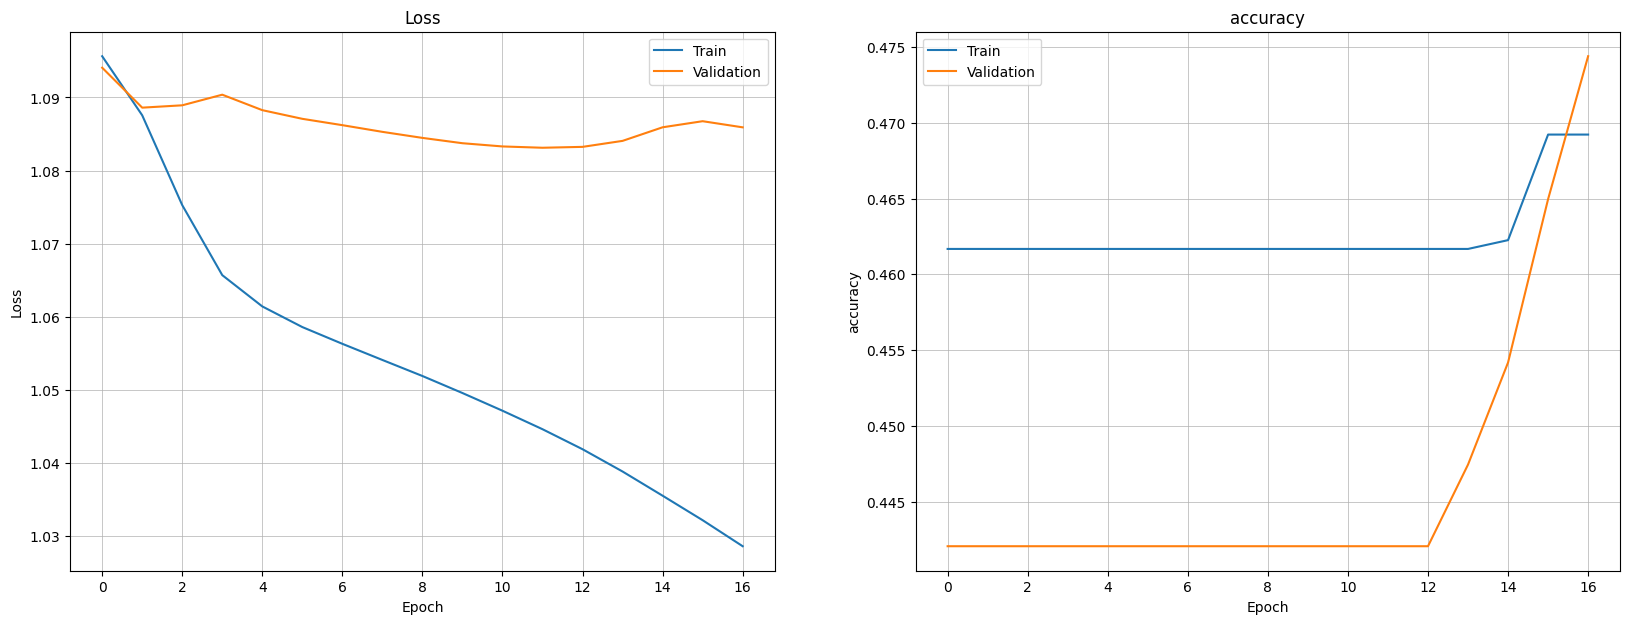

5/5 [==============================] - 0s 6ms/step - loss: 1.1067 - accuracy: 0.3467
✅ Model evaluated: loss 1.11 accuracy 0.35


Accuracy baseline fold n°7 = 0.39
Accuracy LSTM fold n°7 = 0.35
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -11.48 % 

Result for all folds
Average accuracy baseline = 0.39
Average accuracy LSTM = 0.39
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -0.88 % 



In [8]:
cross_validate(df)

# Model training

In [8]:
from workflow.params import FOLD_LENGTH, FOLD_STRIDE, STRIDE, TRAIN_TEST_RATIO, N_FEATURES, INPUT_LENGTH, TARGET, TARGET_COLUMN_IDX, N_TARGETS, OUTPUT_LENGTH, HORIZON

In [9]:
(df_train, df_test) = train_test_split(fold = df,
                                        train_test_ratio = TRAIN_TEST_RATIO,
                                        input_length = INPUT_LENGTH,
                                        horizon = HORIZON)

In [10]:
df_train.shape, df_test.shape

((1242, 10), (540, 10))

In [11]:
X_train, y_train = get_X_y(fold = df_train,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)

X_test, y_test = get_X_y(fold = df_test,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)

Split-set shape:
X: (1229, 7, 10), y: (1229, 7)
Split-set shape:
X: (527, 7, 10), y: (527, 7)


In [12]:
model = init_model(X_train, y_train)
compile_model(model)
model, history = fit_model(model, X_train, y_train)

2022-12-05 12:37:15.630937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


fit_model executed in 35.79 seconds, using up to 21.7MB of RAM


In [163]:
res = evaluate_model(model, X_test, y_test)
res

17/17 [==============================] - 0s 6ms/step - loss: 1.1228 - accuracy: 0.3012
✅ Model evaluated: loss 1.12 accuracy 0.3


[1.122841477394104, 0.3011656403541565]

# Prediction

In [143]:
y_true = y_test
y_pred_proba = predict(model, X_test)

17/17 [==============================] - 0s 5ms/step


In [144]:
y_pred_proba

array([[[0.3 , 0.35, 0.35],
        [0.3 , 0.35, 0.35],
        [0.3 , 0.36, 0.34],
        ...,
        [0.33, 0.38, 0.29],
        [0.36, 0.39, 0.25],
        [0.4 , 0.4 , 0.2 ]],

       [[0.3 , 0.35, 0.35],
        [0.29, 0.35, 0.36],
        [0.28, 0.36, 0.36],
        ...,
        [0.28, 0.37, 0.35],
        [0.28, 0.38, 0.34],
        [0.3 , 0.39, 0.31]],

       [[0.3 , 0.35, 0.35],
        [0.29, 0.35, 0.35],
        [0.29, 0.36, 0.35],
        ...,
        [0.32, 0.37, 0.3 ],
        [0.35, 0.39, 0.26],
        [0.4 , 0.4 , 0.2 ]],

       ...,

       [[0.3 , 0.35, 0.35],
        [0.29, 0.35, 0.36],
        [0.29, 0.36, 0.36],
        ...,
        [0.31, 0.37, 0.32],
        [0.34, 0.38, 0.28],
        [0.39, 0.4 , 0.21]],

       [[0.3 , 0.35, 0.35],
        [0.29, 0.35, 0.35],
        [0.29, 0.36, 0.35],
        ...,
        [0.29, 0.37, 0.34],
        [0.26, 0.38, 0.36],
        [0.22, 0.4 , 0.38]],

       [[0.3 , 0.35, 0.35],
        [0.28, 0.35, 0.37],
        [0.26, 0

In [145]:
y_pred_proba[-1]

array([[0.3 , 0.35, 0.35],
       [0.28, 0.35, 0.37],
       [0.26, 0.35, 0.39],
       [0.24, 0.36, 0.4 ],
       [0.23, 0.37, 0.4 ],
       [0.25, 0.4 , 0.35],
       [0.3 , 0.44, 0.26]], dtype=float32)

In [146]:
from workflow.baseline import baseline

accuracy = baseline(df)
accuracy

0.3916242218449349

In [147]:
index_list = []
for i in range(0,7):
    index_max = list(np.argmax(y_pred_proba[:,i,:], axis=1))
    index_list.append(index_max)

In [148]:
pd.DataFrame(np.array(index_list)).head(15)

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,1,1,1,1,2,2,1,2,1,2,...,1,2,1,1,1,1,1,1,1,1
1,1,2,1,2,2,2,1,2,2,2,...,2,2,2,1,2,2,2,2,1,2
2,1,1,1,2,2,2,1,2,2,2,...,2,2,1,1,2,2,1,1,1,2
3,1,1,1,2,2,2,1,2,2,2,...,2,2,1,1,2,2,2,1,1,2
4,1,1,1,2,2,1,1,2,1,2,...,2,2,1,1,2,1,2,1,1,2
5,1,1,1,2,1,1,1,1,1,2,...,1,2,1,1,2,1,2,1,1,1
6,0,1,0,1,1,1,0,1,1,2,...,1,2,1,0,2,1,2,1,1,1


In [149]:
pd.DataFrame(np.reshape(np.ravel(np.array(index_list).T),(527,7)))

,0,1,2,3,4,5,6
0,1,1,1,1,1,1,0
1,1,2,1,1,1,1,1
2,1,1,1,1,1,1,0
3,1,2,2,2,2,2,1
4,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...
522,1,2,2,2,1,1,1
523,1,2,1,2,2,2,2
524,1,2,1,1,1,1,1
525,1,1,1,1,1,1,1


In [150]:
y_true.shape

(527, 7)

In [151]:
y_true = np.ravel(y_true)

In [152]:
y_true.shape

(3689,)

In [154]:
np.array(index_list).shape

(7, 527)

In [155]:
y_pred = np.ravel(np.array(index_list).T)
y_pred.shape

(3689,)

In [156]:
from sklearn.metrics import accuracy_score

accuracy_f = accuracy_score(y_true, y_pred)
accuracy_f

0.32393602602331256

# Confusion matrix (to finish)

In [157]:
results_df = pd.DataFrame({"actual": y_true,
                           "predicted": y_pred})

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

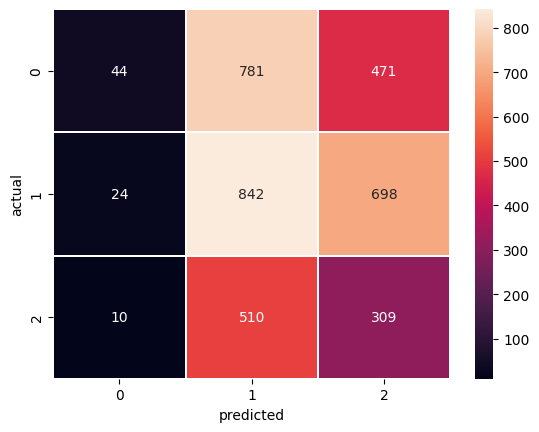

In [170]:
#Create a Confusion Matrix heatmap from the above data
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", linewidths = 0.01);